In [17]:
import csv
#import each of the 150 rows as a list of list
#so, we have a total of 5 lists all contained within one big list
dataset = [[], [], [], [], []]
#we can also ignore the rows which don't have all the columns 
with open('iris.csv') as f:
    for row in csv.reader(f):
        if len(row) == 5:
            for i in range(4):
                dataset[i].append(float(row[i]))
            dataset[4].append(row[4])
            
        
    


In [18]:
def mean(x):
    return sum(x) / len(x)
def std(x):
    u = mean(x)
    diff = [(x_i - u)**2 for x_i in x]
    diff = (mean(diff))**0.5
    return diff
    

In [19]:
measurements = [ "sepal length", "sepal width", "petal length", "petal width" ]


In [20]:
for i, m in enumerate(measurements):
    print(f"{m} mean {mean(dataset[i]):.4f} std {std(dataset[i]):.4f}")

sepal length mean 5.8433 std 0.8253
sepal width mean 3.0540 std 0.4321
petal length mean 3.7587 std 1.7585
petal width mean 1.1987 std 0.7606


In [21]:
#iris_types = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
iris_types = set(dataset[4])
iris_types


{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}

In [22]:
#repeating the printing loop again
for i, m in enumerate(measurements):
    print(f'Now printing for: {m}')
    for iris in iris_types:
        values = [v for v, t in zip(dataset[i], dataset[4]) if iris == t]
        print(f'{iris} Mean is: {mean(values):.4f} and StdDev is: {std(values):.4f}')
    print()
    

Now printing for: sepal length
Iris-versicolor Mean is: 5.9360 and StdDev is: 0.5110
Iris-virginica Mean is: 6.5880 and StdDev is: 0.6295
Iris-setosa Mean is: 5.0060 and StdDev is: 0.3489

Now printing for: sepal width
Iris-versicolor Mean is: 2.7700 and StdDev is: 0.3106
Iris-virginica Mean is: 2.9740 and StdDev is: 0.3193
Iris-setosa Mean is: 3.4180 and StdDev is: 0.3772

Now printing for: petal length
Iris-versicolor Mean is: 4.2600 and StdDev is: 0.4652
Iris-virginica Mean is: 5.5520 and StdDev is: 0.5463
Iris-setosa Mean is: 1.4640 and StdDev is: 0.1718

Now printing for: petal width
Iris-versicolor Mean is: 1.3260 and StdDev is: 0.1958
Iris-virginica Mean is: 2.0260 and StdDev is: 0.2719
Iris-setosa Mean is: 0.2440 and StdDev is: 0.1061



In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm
import numpy as np

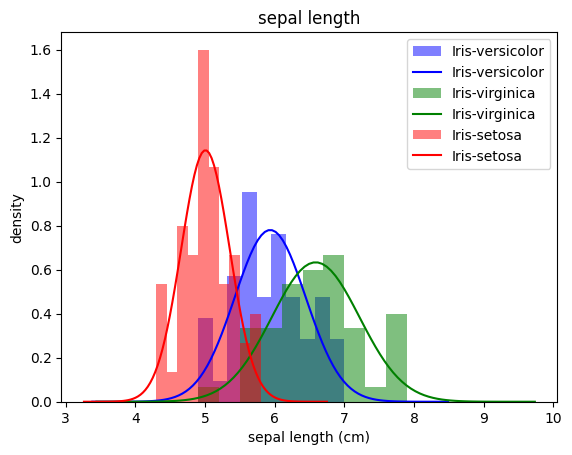

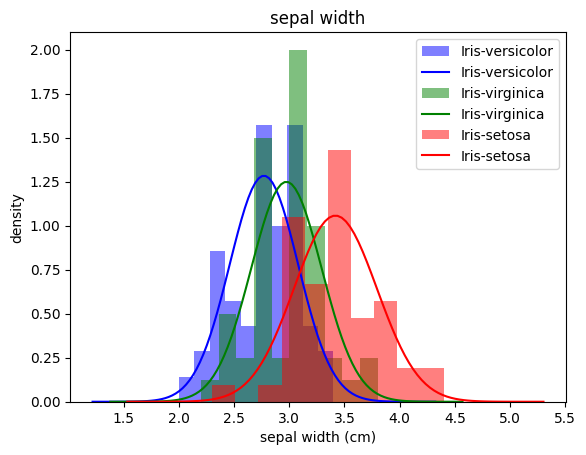

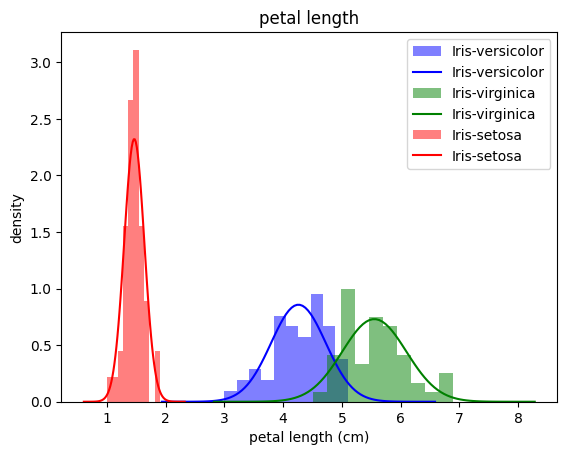

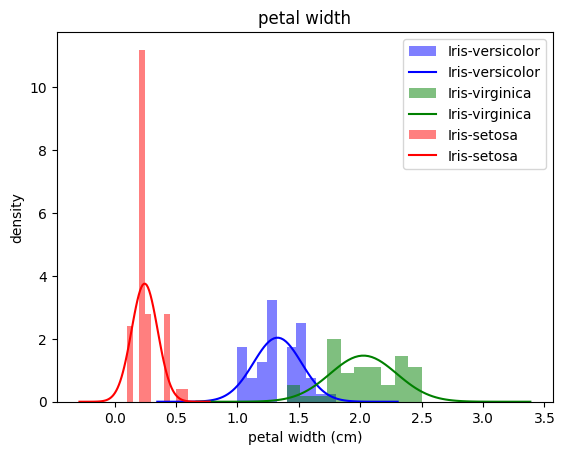

In [24]:
colors = ['b', 'g', 'r']
for i, m in enumerate(measurements):
    plt.figure()
    plt.title(m)
    for type, color in zip(iris_types, colors):
        values = [ v for v, t in zip(dataset[i], dataset[4]) if t == type ]
        mn = mean(values)
        v = std(values)
        plt.hist(values, density=True, alpha=0.5, color=color, label=type)
        x = np.linspace(mn - 5*v, mn + 5*v, 100)
        plt.plot(x, norm(mn, v).pdf(x), label=type, color=color)
        plt.xlabel(f"{m} (cm)")
        plt.ylabel("density")
    plt.legend()
        
    

NOW, DONE WITH THE FIRST EXERCISE OF LAB0 and moving onwards.

In [25]:
import json
with open('bike.json') as f:
    dataset = json.load(f)

In [26]:
dataset["network"].keys()

dict_keys(['company', 'href', 'id', 'location', 'name', 'source', 'stations'])

In [27]:
dataset["network"]["stations"]


[{'empty_slots': 0,
  'extra': {'number': 1,
   'reviews': 72,
   'score': 4.0,
   'status': 'offline',
   'uid': '537'},
  'free_bikes': 0,
  'id': 'f01c3eb11d001cdeb048c5153d2312ae',
  'latitude': 45.04440354326403,
  'longitude': 7.617623805999756,
  'name': '01. Gerbido',
  'timestamp': '2023-08-13T18:58:27.614000Z'},
 {'empty_slots': 0,
  'extra': {'number': 2,
   'reviews': 26,
   'score': 3.4,
   'status': 'offline',
   'uid': '538'},
  'free_bikes': 0,
  'id': 'bc312c77398b36b68dcc11a936231be8',
  'latitude': 45.067519551794994,
  'longitude': 7.563056945800781,
  'name': '02. Fabbrichetta',
  'timestamp': '2023-08-13T18:58:27.615000Z'},
 {'empty_slots': 0,
  'extra': {'number': 3,
   'reviews': 28,
   'score': 3.9,
   'status': 'offline',
   'uid': '539'},
  'free_bikes': 0,
  'id': 'd5b824f8f0b24055820952cae13d8eb6',
  'latitude': 45.056364402185814,
  'longitude': 7.580995559692383,
  'name': '03. Borgo',
  'timestamp': '2023-08-13T18:58:27.615000Z'},
 {'empty_slots': 0,
  '

it appears to be a list of dictionaries. with each entry in the list supposedly for one unique station. 

In [28]:
active_stations = [ station for station in dataset["network"]["stations"] if station["extra"]["status"] == "online" ]
print("Number of active stations", len(active_stations))

Number of active stations 10


In [29]:
free_bikes = [station["free_bikes"] for station in dataset["network"]["stations"]]
print(f"The number of total free bikes is: {sum(free_bikes)}")


The number of total free bikes is: 14


In [30]:
free_slots = [station["empty_slots"] for station in dataset["network"]["stations"]]
print(f"The number of free slots is: {sum(free_slots)}")


The number of free slots is: 45


In [31]:
from math import cos, acos, sin
def distance_coords(lat1, lng1, lat2, lng2):
    """Compute the distance among two points."""
    deg2rad = lambda x: x * 3.141592 / 180
    lat1, lng1, lat2, lng2 = map(deg2rad, [ lat1, lng1, lat2, lng2 ])
    R = 6378100 # Radius of the Earth, in meters
    return R * acos(sin(lat1) * sin(lat2) + cos(lat1) * cos(lat2) * cos(lng1 - lng2))


In [33]:
#i already have the distance coord function. i can make another function into which i give the lat long and the dataset
def closest_dist(dataset, lat, lng):
    v = [ (s, distance_coords(lat, lng, s["latitude"], s["longitude"])) for s in dataset["network"]["stations"] if s["free_bikes"] > 0 ]
    #i have a list of tuples and i can go along them and find the one which has the minimum c
    return min(v, key=lambda w: w[1])
station, closest_station = closest_dist(dataset, 45.074512, 7.694419)
print(f"The closest station is: {station['name']} and its distance to the points given is: {closest_station:.4f}")
print(f"The number of free bikes available at this station are: {station['free_bikes']}")


The closest station is: 08. San Marchese and its distance to the points given is: 6486.1431
The number of free bikes available at this station are: 2


NOW, FOR THE MNIST DASTASET EXERCISE. 

In [34]:
import csv

In [35]:
dset = []
labels = []
with open('mnist.csv') as f:
    for row in csv.reader(f):
        labels.append(int(row.pop(0)))
        dset.append(list(map(int, row)))
        

In [44]:
def get_char(pixel):
    my_dict = {
        (0, 64): " ", 
        (64, 128): ".", 
        (128, 192): "*",
        (192, 256): "#" 
    }
    for (a,b), k in my_dict.items():
        if a <= pixel < b:
            return k

def get_figure(dset, digit):
     listof_chars = list(map(get_char, dset[digit]))
     for i in range(28):
        for j in range(28):
            print(listof_chars[i*28+j], end="")
        print() 


In [45]:
get_figure(dset, 129)

                            
                            
                            
                            
                            
              .#      **    
             .##..*#####    
            #########*.     
           #####***.        
          ##*               
         *##                
         ##                 
        .##                 
         ###*               
         .#####.            
            *###*           
              *###*         
                ###         
                .##         
                ###         
              .###          
        .    *###.          
       .# .*###*            
       .######.             
        *##*.               
                            
                            
                            
